Imports

In [19]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

## data loading

In [8]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transforms.ToTensor())
# transforming the data to tensor as they are in PIL format


100%|██████████| 170M/170M [00:03<00:00, 47.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [10]:
# remeber we are not loading here. We are only creating a dataset to load the data
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True) #shuffling the data is important here


In [11]:
dataiterator = iter(trainloader) # to access trainloader we create an iterator over it

images, labels = next(dataiterator) # will return first batch of images, batches will be same as what we have specified in Dataloader

print(images.shape)  #batchsize, channels, image dimensions

print(images[0].shape) #channels, image dimensions

print(labels[0].item()) # gives the label

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
6


## visualize data

In [12]:
# now accessing the first image

img = images[0]

# to plot it we have to convert it to numpy

npimg = img.numpy()
print(npimg.shape) # same dimensions as above

(3, 32, 32)


(32, 32, 3)


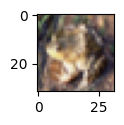

In [13]:
# to be able to plot this image we need to have it as x,y,x and hence have to transpose it

npimg = np.transpose(npimg, (1,2,0)) #we make first index as x, second index as y and 0th index as z for it to become like a normal image
print(npimg.shape)

# now plot it

plt.figure(figsize=(1,1))
plt.imshow(npimg) # supposed to be a dog as class 5
plt.show()

In [14]:
def plot_img(img):
    npimg = img.numpy()
    npimg = np.transpose(npimg, (1,2,0))
    plt.figure(figsize=(5,5))
    plt.imshow(npimg)

frog truck car plane


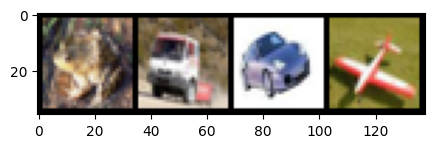

In [15]:
plot_img(torchvision.utils.make_grid(images)) # make the grid of images of the batch
print(' '.join(classes[labels[j]] for j in range(4))) # also print classes of the images

### Single Conv Layer

In [16]:


class FirstCNN(nn.Module):  #inherit the class nn.module
  def __init__(self):
    super(FirstCNN, self).__init__() # call init of parent class
    self.conv1 = nn.Conv2d(3, 16, 5) # input channels, output channels, kernel size(can be also written as tuple)

  def forward(self, x):
    x = self.conv1(x)
    return x

In [17]:
net = FirstCNN()

In [18]:
output = net(images)
output.shape #batchsize, output channels or no of kernels/filters applied, result of conv output as 32x32 has shrunk now bcoz of no padding


torch.Size([4, 16, 28, 28])

In [20]:
for param in net.parameters():
  print(param.shape) #no of kernels, input 3 channels, and last 2 nos correspond to kernel size
  #next print is for bias as eac kernel has a bias

torch.Size([16, 3, 5, 5])
torch.Size([16])


(28, 28)


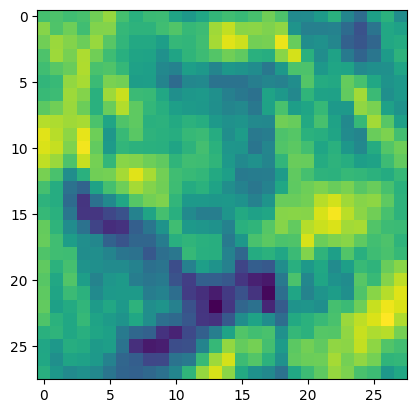

In [21]:
# now i want to look at output of one channel
out1 = output[0,0,:,:].detach().numpy() #0th batch, 0th channel out of 16 kernel applied, all the shrunken dimernsions
print(out1.shape)
plt.imshow(out1)
plt.show()

# this is for 0th image which was a dog. So 0 channels learns somethings like this for the dog
# whatever is being lightened up is being preserved

### Deep Conv Network

In [22]:
class FirstCNN_v2(nn.Module): #inherit the class nn.module
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8 , 3),  # input channels, output channels, kernel size(can be also written as tuple)
        nn.Conv2d(8, 16 , 3) # prev channel output, output channels, kernel size(can be also written as tuple)
    )

  def forward(self, x):
    x= self.model(x)
    return x


In [ ]:
deenet